In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

from data_analysis.load_data import SimulationAnalyzer

In [48]:
def generate_statistics_table_by_team(team_data_analyzers):
    stats_df = pd.DataFrame()

    goals = []
    possession = []
    shots = []
    passes = []
    fouls = []

    for analyzer in team_data_analyzers:
        goals.append(analyzer.goals)
        possession.append(analyzer.possession)
        shots.append(analyzer.shots)
        passes.append(analyzer.passes)
        fouls.append(analyzer.fouls)

    for n,p in [('goals',goals),('possession',possession),('shots',shots),('passes',passes),('fouls',fouls)]:
        mean = np.mean(p)
        std_dev = np.std(p)
        median = np.median(p)
        percentiles = np.percentile(p, [25, 50, 75])
        stats_df = stats_df.append({
            'property': n,
            'mean': mean,
            'std_dev': std_dev,
            'median': median,
            '25th_percentile': percentiles[0],
            '50th_percentile': percentiles[1],
            '75th_percentile': percentiles[2]
        }, ignore_index=True)
        
        
    return stats_df

def generate_statistics_player_by_team(team_data_analyzers):
    data=[]

    for team_data in team_data_analyzers:
        for kp,vp in team_data.player_statistics.items():
            row={'dorsal':kp}

            for k,v in vp.items():
                row[k]=v
            
            data.append(row)
            

    df = pd.DataFrame(data)

    statistics_mean = df.groupby('dorsal').mean()

    fig, ax = plt.subplots(figsize=(10, 6)) 
    statistics_mean.plot(kind='bar', ax=ax,width=1.5)

    ax.set_title('Statistics mean by player')
    ax.set_ylabel('Mean')
    ax.set_xlabel('Dorsal')

    plt.show()

def generate_statistics(simulation):
    home=[g.home_data for g in simulation.games]
    away=[g.away_data for g in simulation.games]

    
    display(generate_statistics_table_by_team(home))
    display(generate_statistics_table_by_team(away))

    generate_statistics_player_by_team(home)
    generate_statistics_player_by_team(away)



/tmp/ipykernel_1630/1261209956.py:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_1630/1261209956.py:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_1630/1261209956.py:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_1630/1261209956.py:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_1630/1261209956.py:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,property,mean,std_dev,median,25th_percentile,50th_percentile,75th_percentile
0,goals,0.700000,0.822598,0.5,0.00,0.5,1.00
1,possession,88.333333,17.004575,86.5,78.25,86.5,98.75
2,shots,10.033333,1.303414,10.0,9.00,10.0,11.00
3,passes,30.000000,6.180615,28.0,26.00,28.0,32.75
4,fouls,0.266667,0.512076,0.0,0.00,0.0,0.00


/tmp/ipykernel_1630/1261209956.py:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_1630/1261209956.py:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_1630/1261209956.py:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_1630/1261209956.py:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_1630/1261209956.py:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,property,mean,std_dev,median,25th_percentile,50th_percentile,75th_percentile
0,goals,0.600000,0.663325,0.5,0.00,0.5,1.00
1,possession,91.666667,17.004575,93.5,81.25,93.5,101.75
2,shots,9.700000,1.486607,9.5,9.00,9.5,11.00
3,passes,27.033333,5.647910,27.0,23.00,27.0,31.00
4,fouls,1.033333,0.948098,1.0,0.00,1.0,2.00


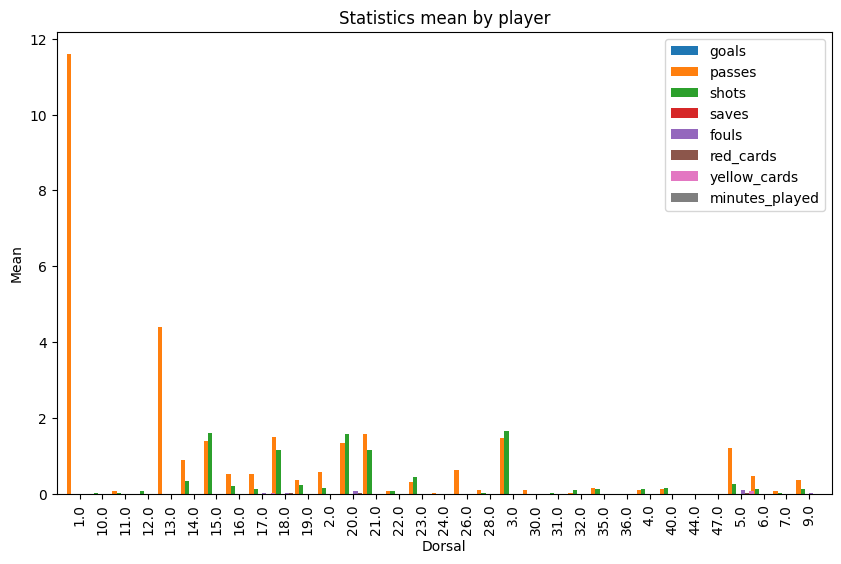

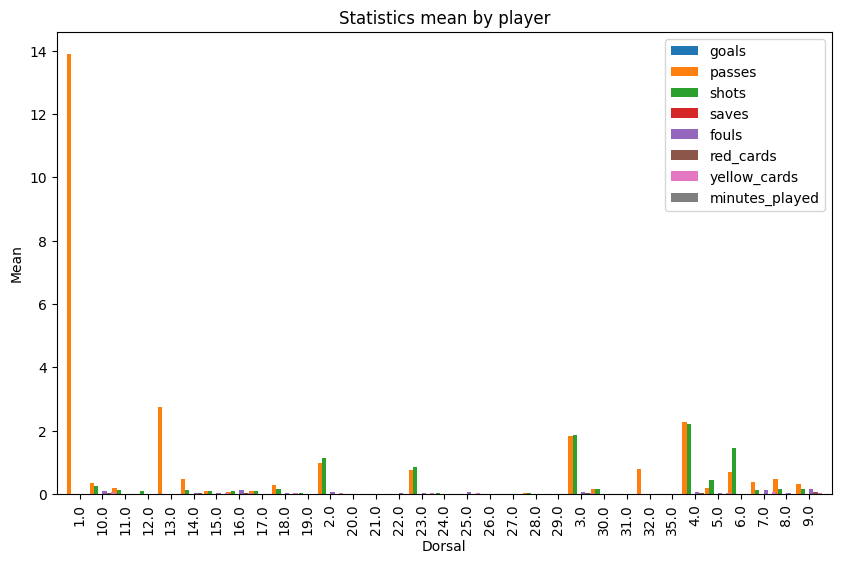

In [49]:
smart_player = SimulationAnalyzer('../data/smart_player.json')
smart_player.analyze()

generate_statistics(smart_player)